# Universidad del Valle de Guatemala
# Data Science - Sección: 10
## Integrantes
### Mario Guerra - 21008
### Javier Alvarado - 21188

In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

## Carga de Archivo

In [2]:
# Descargar recursos de NLTK si no están disponibles
nltk.download('stopwords')
nltk.download('punkt_tab')

# Cargar los datos desde el archivo CSV
train_file = pd.read_csv("train.csv")

print(train_file)

# Información básica del dataset
print(train_file.info())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


         id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UT

## Limpieza y Preprocesamiento de Datos

In [3]:
# Función para limpiar el texto de los tweets
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Quitar URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Quitar caracteres especiales y puntuación
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenización
    words = word_tokenize(text)
    # Quitar stopwords
    stop_words = set(stopwords.words('english'))
    cleaned_text = [word for word in words if word not in stop_words]
    return ' '.join(cleaned_text)

# Aplicar la función de limpieza a la columna de texto
train_file['clean_text'] = train_file['text'].apply(clean_text)

# Mostrar las primeras filas con el texto limpio
print(train_file[['text', 'clean_text']].head())

train_file.to_csv("train-cleaned.csv")

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


## Frecuencia en las Palabras de Tweets de Desastre

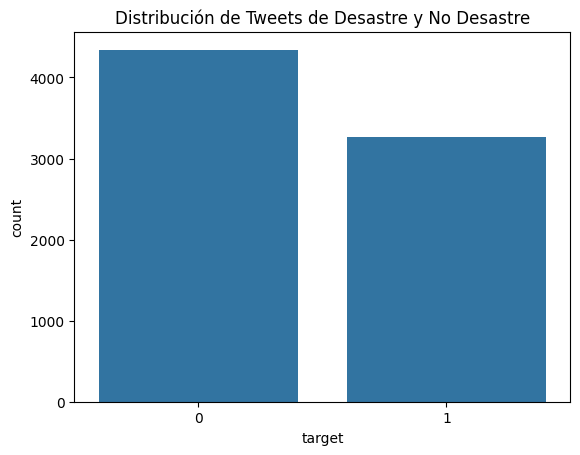

In [4]:
# Revisar la distribución de la variable objetivo
sns.countplot(x='target', data=train_file)
plt.title('Distribución de Tweets de Desastre y No Desastre')
plt.show()

## Análisis Exploratorio

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.probability import FreqDist
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Cargar los datos desde el archivo CSV
train_file = pd.read_csv("train-cleaned.csv")

# Separar los tweets por categoría
disaster_tweets = train_file[train_file['target'] == 1]
non_disaster_tweets = train_file[train_file['target'] == 0]

# Unir todos los textos en cada categoría
all_words_disaster = ' '.join(disaster_tweets['clean_text'])
all_words_non_disaster = ' '.join(non_disaster_tweets['clean_text'])

# Crear frecuencias de palabras
fdist_disaster = FreqDist(all_words_disaster.split())
fdist_non_disaster = FreqDist(all_words_non_disaster.split())

# Mostrar las 10 palabras más comunes en cada categoría
print("Palabras más comunes en tweets de desastres:")
print(fdist_disaster.most_common(10))

print("\nPalabras más comunes en tweets de no desastres:")
print(fdist_non_disaster.most_common(10))


Palabras más comunes en tweets de desastres:
[('fire', 180), ('news', 140), ('via', 121), ('disaster', 117), ('california', 111), ('suicide', 110), ('police', 107), ('amp', 107), ('people', 105), ('killed', 93)]

Palabras más comunes en tweets de no desastres:
[('like', 253), ('im', 248), ('amp', 193), ('new', 170), ('get', 163), ('dont', 154), ('one', 128), ('body', 113), ('via', 99), ('would', 97)]


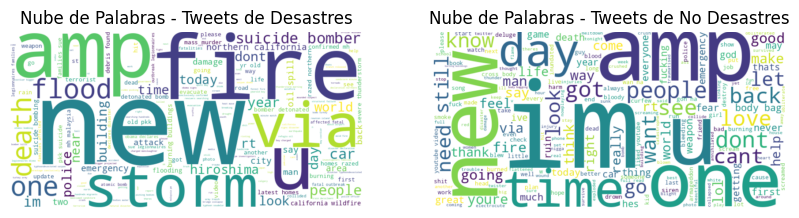

In [6]:
# Crear una nube de palabras para cada categoría
wordcloud_disaster = WordCloud(width=800, height=400, background_color='white').generate(all_words_disaster)
wordcloud_non_disaster = WordCloud(width=800, height=400, background_color='white').generate(all_words_non_disaster)

# Mostrar las nubes de palabras
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_disaster, interpolation='bilinear')
plt.title('Nube de Palabras - Tweets de Desastres')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_disaster, interpolation='bilinear')
plt.title('Nube de Palabras - Tweets de No Desastres')
plt.axis('off')

plt.show()

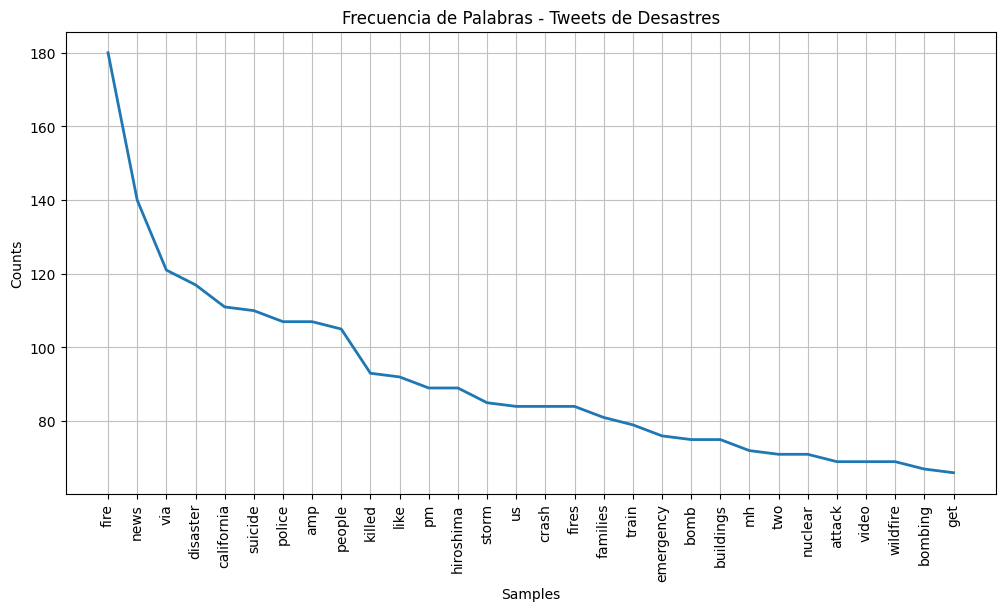

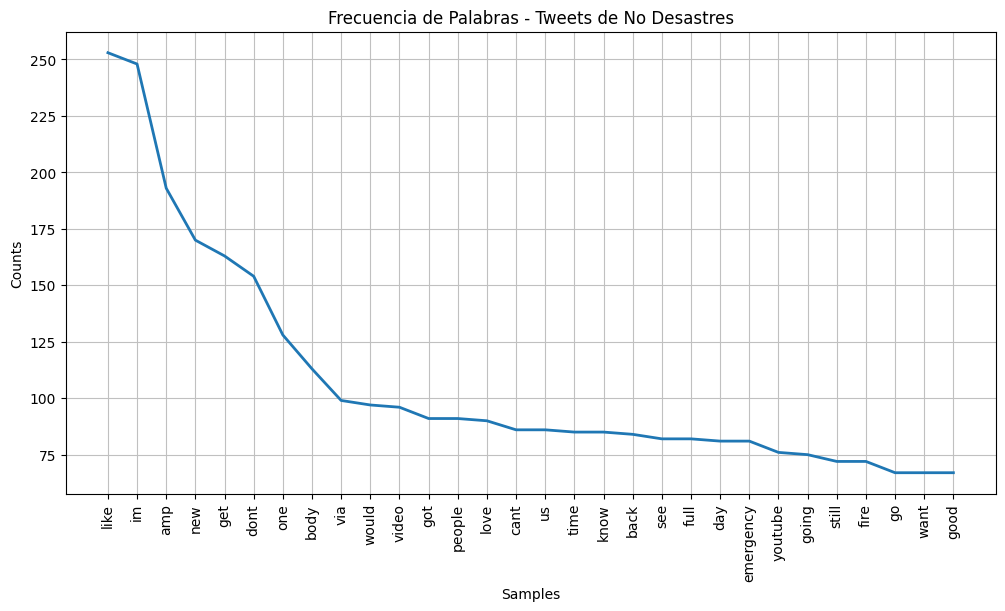

In [7]:
# Crear un histograma de las palabras más comunes en tweets de desastre
plt.figure(figsize=(12, 6))
fdist_disaster.plot(30, title='Frecuencia de Palabras - Tweets de Desastres')
plt.show()

# Crear un histograma de las palabras más comunes en tweets de no desastre
plt.figure(figsize=(12, 6))
fdist_non_disaster.plot(30, title='Frecuencia de Palabras - Tweets de No Desastres')
plt.show()

In [8]:
# Obtener palabras comunes entre las dos categorías
common_words = set(fdist_disaster.keys()).intersection(set(fdist_non_disaster.keys()))

print("Palabras comunes entre ambas categorías:")
print(common_words)

Palabras comunes entre ambas categorías:
{'placing', 'shift', 'believe', 'temperature', 'noonancindynoonanheartbreak', 'hours', 'rise', 'detained', 'pakistans', 'front', 'aa', 'gift', 'ready', 'tide', 'yes', 'attention', 'voter', 'tweet', 'bands', 'beat', 'spider', 'derailed', 'hatred', 'pepper', 'reuters', 'crisis', 'wud', 'lunch', 'fear', 'rejects', 'meeting', 'happens', 'project', 'emotions', 'emergency', 'evidence', 'jail', 'fossil', 'situation', 'fishing', 'enemy', 'fair', 'verdict', 'meet', 'beer', 'jax', 'needed', 'ptsdchat', 'justice', 'controllers', 'shocked', 'cobra', 'lie', 'lizards', 'thrown', 'fuels', 'trinity', 'series', 'psychiatric', 'became', 'although', 'hunger', 'knowing', 'smart', 'playlist', 'beach', 'coyotes', 'door', 'hunk', 'thriller', 'angeles', 'isnt', 'everyone', 'mi', 'ronaldo', 'soon', 'neighborhood', 'fans', 'hasnt', 'pan', 'via', 'recovery', 'sat', 'drifting', 'management', 'anymore', 'reported', 'ep', 'roof', 'tragedy', 'role', 'lgbt', 'much', 'publicizi

## Modelos de Clasificación

In [9]:
from sklearn.model_selection import train_test_split

# Definir características y la variable objetivo
X = train_file['clean_text']
y = train_file['target']

# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorización de texto
vectorizer = TfidfVectorizer(max_features=5000)  # Puedes ajustar el número de características
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Crear una lista de modelos para probar
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB()
}

# Entrenar y evaluar cada modelo
for model_name, model in models.items():
    model.fit(X_train_vect, y_train)
    y_pred = model.predict(X_test_vect)
    print(f"Resultados para {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print("\n")

Resultados para Logistic Regression:
Accuracy: 0.8023637557452397
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       874
           1       0.82      0.68      0.75       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



Resultados para Random Forest:
Accuracy: 0.7800393959290873
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       874
           1       0.77      0.70      0.73       649

    accuracy                           0.78      1523
   macro avg       0.78      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523



Resultados para Support Vector Machine:
Accuracy: 0.8017071569271176
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       874
           1       0.83      0.68     

## Funciones para Clasificar si es un Tweet de Desastre o no.

In [13]:
from sklearn.model_selection import GridSearchCV

# Ejemplo para ajustar un modelo con Grid Search
param_grid = {'C': [0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, refit=True, verbose=2)
grid.fit(X_train_vect, y_train)
print(grid.best_params_)
print(grid.best_estimator_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ...............................................C=10; total time=   0.1s
[CV] END ........................................